In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../preprocessed_winemag-data copy.csv'  
df = pd.read_csv(file_path)

df.head()

,id,country,description,designation,points,price,province,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
4,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


<Axes: xlabel='winery'>

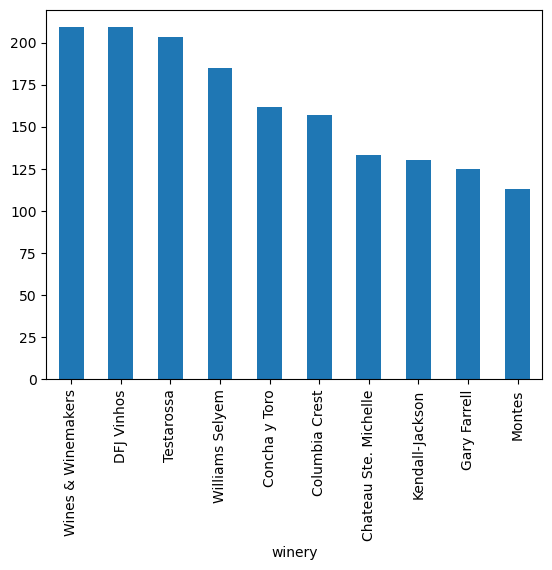

In [134]:
df_short = df.copy()
kirkland = df[df['winery']=='Kirkland Signature'].iloc[:10].copy()
df_short = pd.concat([df_short, kirkland])
df_short.to_csv('short_wines.csv')
df_short.winery.value_counts().head(10).plot.bar()

In [131]:
df['points'].min()

80

In [127]:
import numpy as np

# Grouping the data by 'winery' and 'country'
grouped = df.groupby(['winery'])

# Aggregating the required information
result = grouped.agg({
    'country': lambda x: set(x),     # Country
    'province': lambda x: set(x),  # Set of provinces
    'price': ['min', 'max', 'mean', 'median', np.std],  # Price statistics
    'points': ['min', 'max', 'mean', 'median', np.std],  # Score statistics
    'designation': lambda x: set(x),  # Set of designations
    'variety': lambda x: set(x)       # Set of varieties
}).reset_index()

# Renaming columns to match requirements
result.columns = [
    'winery', 'country', 
    'provinces', 'min_price', 'max_price', 'mean_price', 'median_price', 'price_std_dev',
    'min_score', 'max_score', 'mean_score', 'median_score', 'score_std_dev',
    'designations', 'varieties'
]

# Adding the number of wines per winery-country
result['num_wines'] = grouped.size().values

# result = result.sample(100)

result.to_csv('wineries_info.csv', index=False)


In [98]:
result['Number of Wines'].sort_values(ascending=False).head(10)

3362     209
11578    209
10459    203
11540    185
3093     162
3075     157
2212     133
6206     130
5099     125
7657     113
Name: Number of Wines, dtype: int64

In [5]:
winery_data = pd.read_csv('../winery_data.csv')